In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movie_data=pd.read_csv("/content/netflix_titles.csv")
movie_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
shows=movie_data[movie_data['type']=='TV Show']
movies=movie_data[movie_data['type']=='Movie']

<ipython-input-5-6fe2033827d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="type",data=movie_data,palette="Set2")


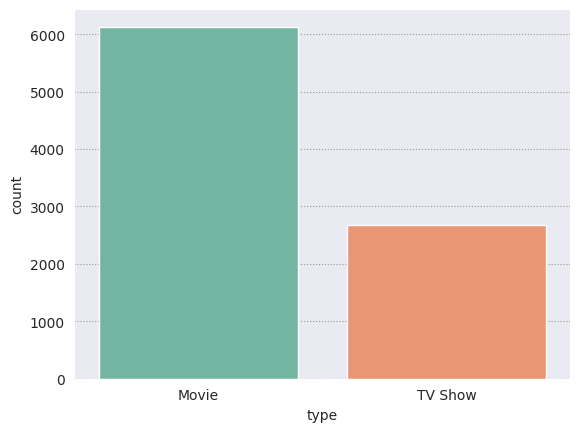

In [ ]:
sns.set_style("darkgrid",{"grid.color":".6","grid.linestyle":":"})
ax=sns.countplot(x="type",data=movie_data,palette="Set2")

<ipython-input-6-d1e2f6c464b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="rating", data=movie_data, palette="Set2", order=movie_data['rating'].value_counts().index[0:15])


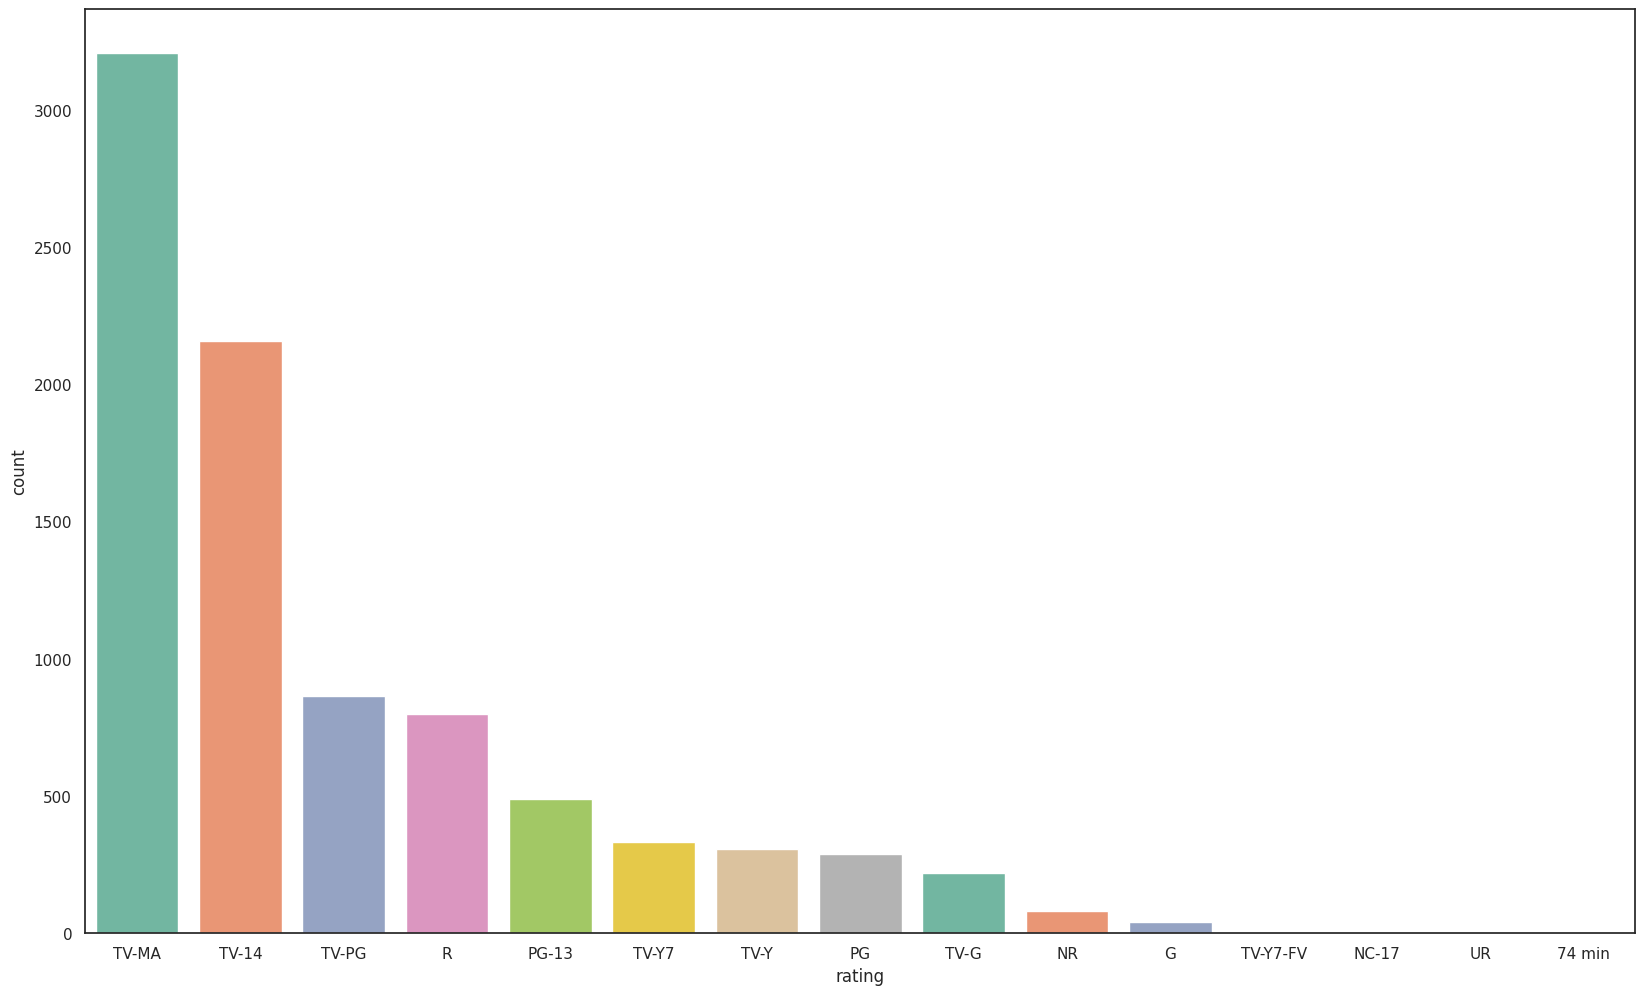

In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="white")
ax = sns.countplot(x="rating", data=movie_data, palette="Set2", order=movie_data['rating'].value_counts().index[0:15])

<ipython-input-7-e2890c717889>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="release_year", data=movie_data, palette="bright", order=movie_data['release_year'].value_counts().index[0:15])


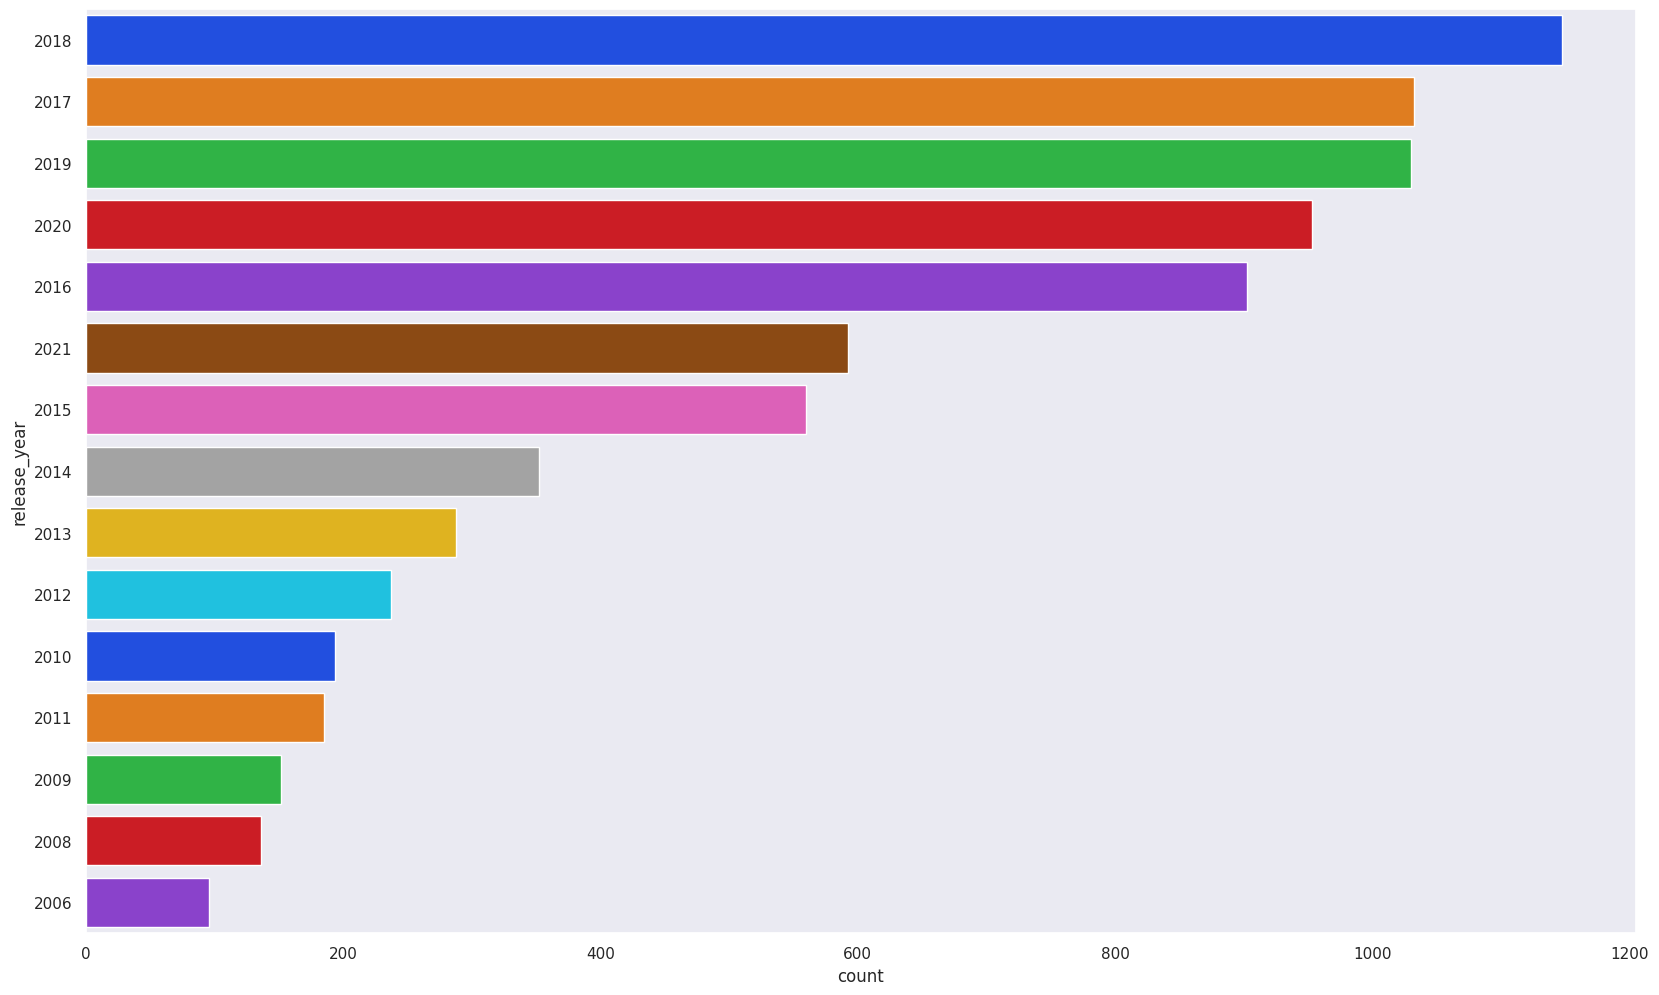

In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="dark")
ax = sns.countplot(y="release_year", data=movie_data, palette="bright", order=movie_data['release_year'].value_counts().index[0:15])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
movie_data['description'] = movie_data['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(movie_data['description'])
tfidf_matrix.shape

(8807, 18895)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(movie_data.index, index=movie_data['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movie_data['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [ ]:
get_recommendations('Dark')

2874                   Altered Carbon
4629                           Maniac
1034                       Synchronic
626     Sophie: A Murder in West Cork
1117         Ibrahim a Fate to Define
4101                        Candyflip
4253       Black Mirror: Bandersnatch
869                  Who Killed Sara?
2979                     THE STRANGER
7348                        Love Rain
Name: title, dtype: object

In [ ]:
missingfilled=movie_data.fillna('')
missingfilled.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
def data_cleaning(x):
        return str.lower(x.replace(" ", ""))

In [ ]:
features=['title','director','cast','listed_in','description']
missingfilled=missingfilled[features]

In [ ]:
for feature in features:
    missingfilled[feature] = missingfilled[feature].apply(data_cleaning)

missingfilled.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [ ]:
def content_include(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
missingfilled['soup'] = missingfilled.apply(content_include, axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
countvec = CountVectorizer(stop_words='english')
countvec_matrix = countvec.fit_transform(missingfilled['soup'])

cosine_sim2 = cosine_similarity(countvec_matrix, countvec_matrix)

In [ ]:
missingfilled=missingfilled.reset_index()
indices = pd.Series(missingfilled.index, index=missingfilled['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movie_data['title'].iloc[movie_indices]

In [ ]:
get_recommendations_new('Dark', cosine_sim2)

260                 The Defeated
3604                    Sintonia
2053             Young Wallander
3744                     Unit 42
5404           The Truth Seekers
6323                 Black Heart
3789              Killer Ratings
4476       Terrorism Close Calls
4673    Inside the Criminal Mind
3855                  The Writer
Name: title, dtype: object

In [ ]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
6922                   Happy Valley
2184                       Get Even
519                   I AM A KILLER
3789                 Killer Ratings
4476          Terrorism Close Calls
Name: title, dtype: object

In [ ]:
get_recommendations_new('Black Mirror', cosine_sim2)

3045                                       Dracula
3551           The Dark Crystal: Age of Resistance
4262                                Watership Down
1301                               Behind Her Eyes
7017    How to Live Mortgage Free with Sarah Beeny
2979                                  THE STRANGER
5365                                         Vexed
69                  Stories by Rabindranath Tagore
1056                                Ajaibnya Cinta
1603                                  Alien Worlds
Name: title, dtype: object